In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
tb = pd.read_csv('petrol_consumption.csv')
tb


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [6]:
tb.shape

(48, 5)

In [14]:
tb.columns = ['податок на бензин', 'середній дохід', 'асфальтні шосе', 'к-ть водійське посвідчення (%)', 'споживання бензину']
# tb.describe().round(2)
tb.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
податок на бензин,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
середній дохід,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
асфальтні шосе,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
к-ть водійське посвідчення (%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
споживання бензину,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


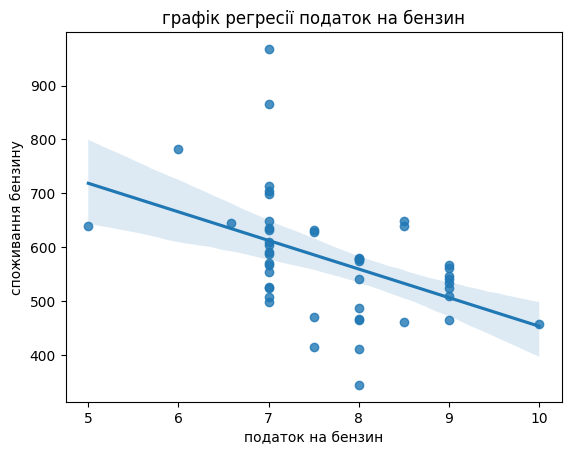

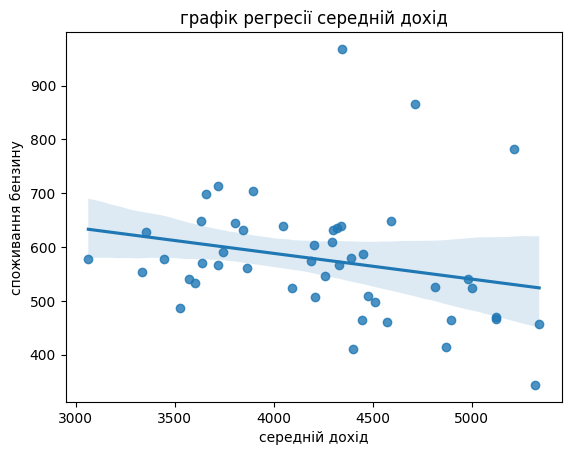

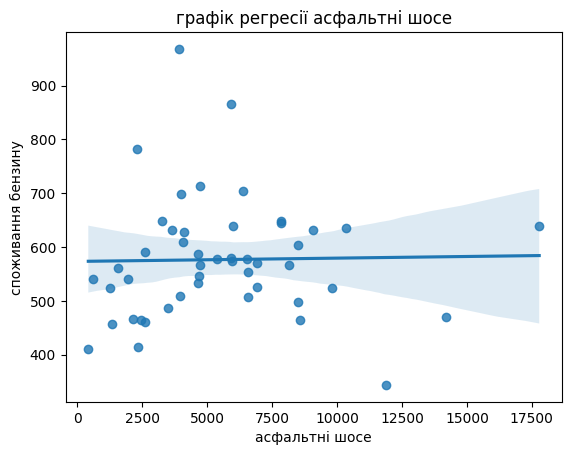

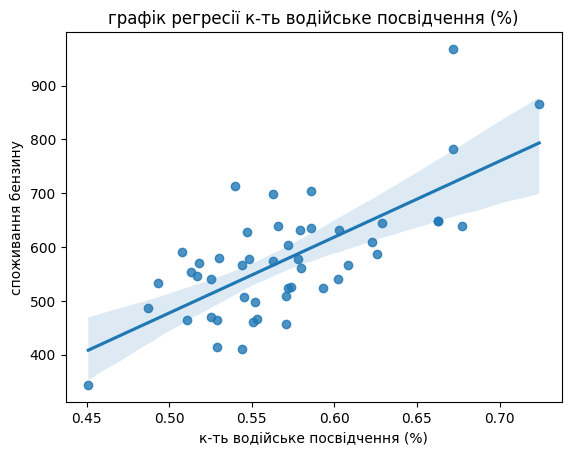

In [18]:
variables = ['податок на бензин', 'середній дохід', 'асфальтні шосе', 'к-ть водійське посвідчення (%)']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='споживання бензину', data=tb).set(title=f'графік регресії {var}')

In [19]:
corelations = tb.corr()
corelations

,податок на бензин,середній дохід,асфальтні шосе,к-ть водійське посвідчення (%),споживання бензину
податок на бензин,1.000000,0.012665,-0.522130,-0.288037,-0.451280
середній дохід,0.012665,1.000000,0.050163,0.157070,-0.244862
асфальтні шосе,-0.522130,0.050163,1.000000,-0.064129,0.019042
к-ть водійське посвідчення (%),-0.288037,0.157070,-0.064129,1.000000,0.698965
споживання бензину,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot: >

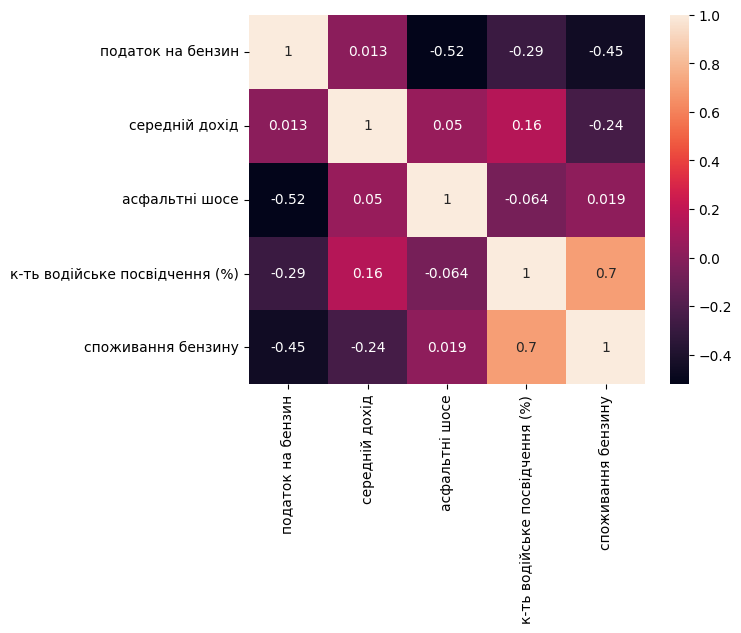

In [21]:
sns.heatmap(corelations, annot=True)

In [22]:
y = tb['споживання бензину']
X = tb[['податок на бензин', 'середній дохід', 'асфальтні шосе', 'к-ть водійське посвідчення (%)']]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

In [28]:
X_train

,податок на бензин,середній дохід,асфальтні шосе,к-ть водійське посвідчення (%)
38,8.50,3635,3274,0.663
20,7.00,4593,7834,0.663
12,7.00,4817,6930,0.574
5,10.00,5342,1333,0.571
43,7.00,3745,2611,0.508
32,8.00,3063,6524,0.578
36,5.00,4045,17782,0.566
46,7.00,4296,4083,0.623
23,9.00,4258,4686,0.517
13,7.00,4207,6580,0.545


In [29]:
y_train

38    648
20    649
12    525
5     457
43    591
32    577
36    640
46    610
23    547
13    508
35    644
33    628
25    566
10    580
30    571
21    540
18    865
2     561
15    635
8     464
26    577
7     467
39    968
44    782
31    554
22    464
41    699
29    534
16    603
28    574
34    487
42    632
6     344
47    524
27    631
4     410
17    714
0     541
Name: споживання бензину, dtype: int64

In [32]:
X.shape

(48, 4)

In [33]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
print('Beta:', model.coef_)
print('Beta0:', model.intercept_)

Beta: [-3.53997019e+01 -5.87239243e-02 -3.65626158e-03  1.37093925e+03]
Beta0: 344.58590039674596


In [36]:
y_pred = model.predict(X_test)

In [38]:
res = pd.DataFrame({"actual": y_test, "predict": y_pred})
res

,actual,predict
45,510,531.533629
3,414,509.733619
1,524,565.297211
14,566,646.095575
37,704,647.966027
40,587,676.771823
9,498,557.480292
11,471,445.944682
19,640,694.919622
24,460,520.896984


In [40]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 58.48
Mean squared error: 3983.85
Root mean squared error: 63.12


In [41]:
model.score(X_test,y_test)

0.42818683491379905

In [42]:
model.score(X_train,y_train)

0.6895815278628233